In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("Linear Regression.xlsx")
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DCFB668C8>,
      dtype=object)

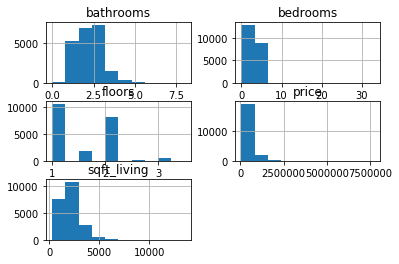

In [4]:
dataset.hist()

In [5]:
dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Assigning features to x and y

In [7]:
dataset.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [11]:
x = dataset.iloc[:,:1]
print(x)


        price
0      221900
1      538000
2      180000
3      604000
4      510000
...       ...
21608  360000
21609  400000
21610  402101
21611  400000
21612  325000

[21613 rows x 1 columns]


In [18]:
y = dataset.iloc[:,4:]
y

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21608,3.0
21609,2.0
21610,2.0
21611,2.0


# split the records for traning and testing

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape

(17290, 1)

In [21]:
X_test.shape

(4323, 1)

In [22]:
y_train.shape

(17290, 1)

In [23]:
y_test.shape

(4323, 1)

# model building with sklearn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg = LinearRegression()

# Train the model

In [27]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.coef_


array([[3.71367164e-07]])

In [29]:
lin_reg.intercept_

array([1.29648443])

# vizualize traning set results

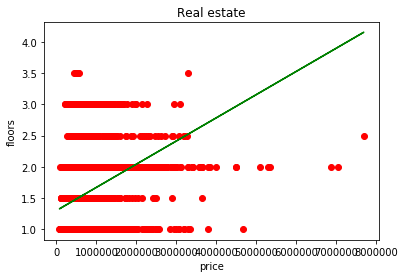

In [36]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,lin_reg.predict(X_train), color = 'green')
plt.title('Real estate')
plt.xlabel('price')
plt.ylabel('floors')
plt.show()

# Test the model

In [33]:
ypred = lin_reg.predict(X_test)
ypred

array([[1.40678047],
       [1.88250181],
       [1.50522991],
       ...,
       [1.43387171],
       [1.40789458],
       [1.51037335]])

In [34]:
X_test

,price
17384,297000
722,1578000
2680,562100
18754,631500
14554,780000
...,...
5427,844000
16547,335500
4585,369950
17762,300000


In [35]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# vizulize test data

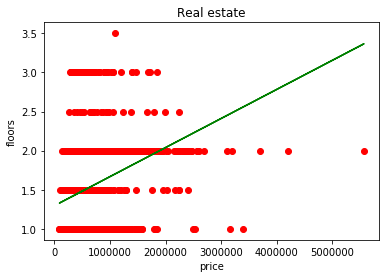

In [38]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test,lin_reg.predict(X_test), color = 'green')
plt.title('Real estate')
plt.xlabel('price')
plt.ylabel('floors')
plt.show()

# estimate the thing

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
Rmse = np.sqrt(mean_squared_error(y_test,ypred))
r_square = r2_score(y_test,ypred)
print(Rmse)
print(r_square)

0.5106035326379263
0.06883851352598913


# how to predict unseen value

In [41]:
#original dataset
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [43]:
unseen_pred = lin_reg.predict(np.array([[1]]))
print(unseen_pred)

[[1.2964848]]
